<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime

In [0]:
# datetime is python's build-in datatype
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [26]:
# crete a datetime object
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [0]:
# pass hour, min and sec
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [28]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [29]:
# to get infor about the datetime obeject call .day, .month, etc.
my_date_time.day

2

In [30]:
my_date_time.hour

13

In [31]:
type(my_date_time)

datetime.datetime

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [33]:
np.array(['2020-03-15','2020-03-16', '2020-03-17'], dtype = 'datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [34]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [35]:
# we can pass similar code as above to get a range of dates
# second parameter is the stepsize
np.arange('2018-06-01', '2018-06-23', 5, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-06', '2018-06-11', '2018-06-16',
       '2018-06-21'], dtype='datetime64[D]')

In [36]:
# lets pass years
np.arange('1982', '2002',2, dtype = 'datetime64[Y]')

array(['1982', '1984', '1986', '1988', '1990', '1992', '1994', '1996',
       '1998', '2000'], dtype='datetime64[Y]')

In [37]:
# Using pandasd to create date_ranges
# args - START, #periods requested, frequence
pd.date_range('2020-01-01', periods = 7, freq = 'D' )

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# pandas can infer a date from a string
pd.date_range('Jan 01 2020', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# to convert to datetime
pd.to_datetime(['1/2/2018', 'Jan 03 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [40]:
# we can pass the format parameter for non-US dates
pd.to_datetime(['02/01/2018', '03/01/2018'], format = '%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [41]:
# creating a timeseries dataframe
data = np.random.randn(3,2)
cols = ['A', 'B']
print (data)

[[-0.81486487  2.40774781]
 [-0.52694443  0.60208185]
 [-0.49582865  0.86129896]]


In [0]:
idx = pd.date_range('2020-01-01', periods = 3, freq = 'D')
df = pd.DataFrame(data, index = idx, columns = cols)

In [43]:
df

,A,B
2020-01-01,-0.814865,2.407748
2020-01-02,-0.526944,0.602082
2020-01-03,-0.495829,0.861299


In [44]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [45]:
df.index.max()

Timestamp('2020-01-03 00:00:00')

## Time Resampling
Similar to a groupby operation with the difference that we are aggregating on time frequency
For example--we can take daily data and resample into monthly data by taking an average or sum of the month'

In [46]:
df = pd.read_csv('starbucks.csv')
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


We can chage the 'Date' column  to a timeseries and set it as the index 

In [47]:
df = pd.read_csv('starbucks.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [48]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [49]:
# Resampling - pass a rule and operations/functions (mean, min, max, std, etc)
# daily to yearly 'A'
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [0]:
# We can create our own functions to resample data
def first_day(entry):
  if len(entry):
    return entry[0]
    

In [51]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


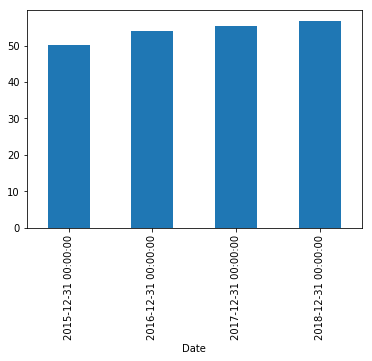

In [52]:
# resampling the 'Close' column yearly and by the mean and plotting it
%matplotlib inline
df['Close'].resample(rule = 'A').mean().plot.bar()

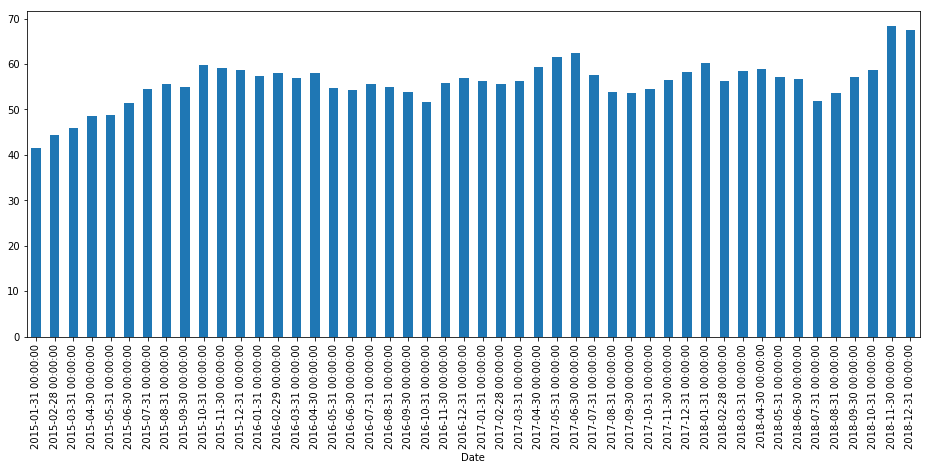

In [53]:
# resampling monthly, getting the max closing price and plotting it
df['Close'].resample(rule = 'M').max().plot.bar(figsize = (16, 6))

In [54]:
# Time Shifting
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


Lets shift the entire date index by a given number of rows without regard for time periods such as months or years.
For instance, shift(1) will shift down the data by one place. As we shift the data down, the first data point will be a NaN and we will lose the last data point. Shifting by -1 would shift the data upwards. 


In [55]:
# Lets shift the entire date index by a given number of rows without regard
# for time periods such as months or years

df.shift(1)


,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


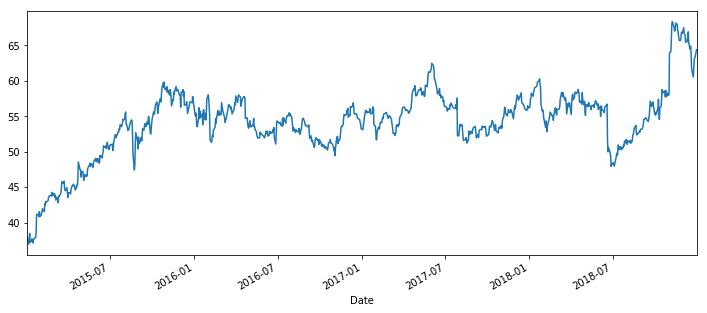

In [56]:
df['Close'].plot(figsize=(12,5))

In [57]:
# Calculate rolling mean
df.rolling(window = 7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


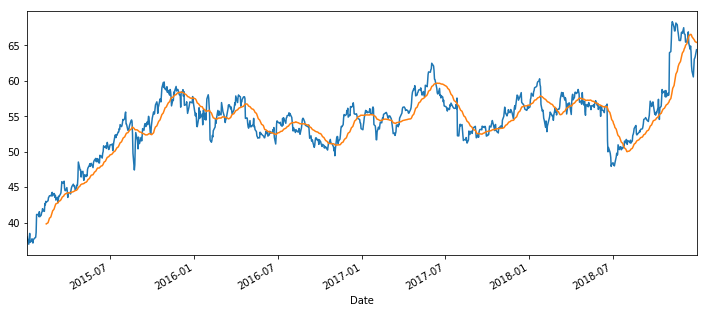

In [58]:
# plot the price and the rolling mean
df['Close'].plot(figsize = (12,5))
df.rolling(window = 30).mean()['Close'].plot()

In [0]:
# create a new column using the rolling mean
df['Close : 30 Day Mean'] = df['Close'].rolling(window = 30).mean()

In [60]:
df.tail()

,Close,Volume,Close : 30 Day Mean
Date,,,
2018-12-24,60.56,6323252,65.963703
2018-12-26,63.08,16646238,65.791913
2018-12-27,63.20,11308081,65.647000
2018-12-28,63.39,7712127,65.525000
2018-12-31,64.40,7690183,65.437000


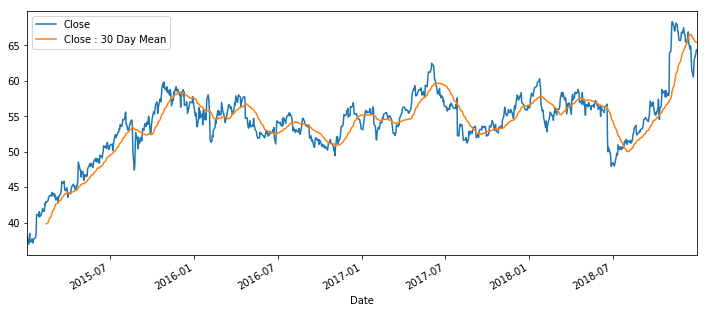

In [61]:
df[['Close', 'Close : 30 Day Mean']].plot(figsize = (12,5))

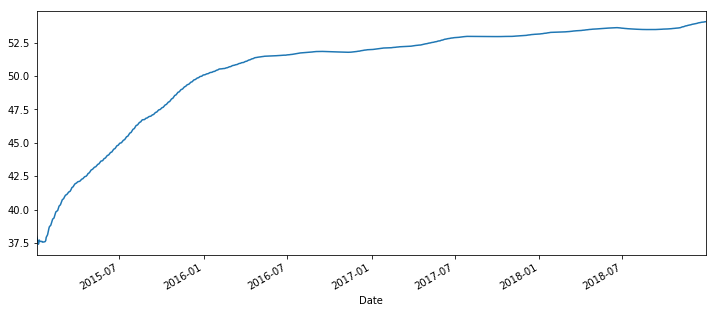

In [62]:
# Expanding
df['Close'].expanding().mean().plot(figsize = (12,5))

## Visualizing Times Series Data


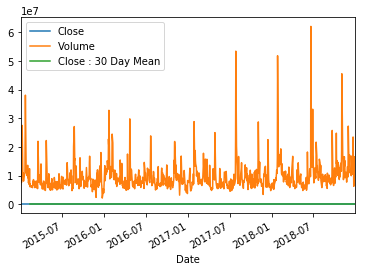

In [63]:
df.plot()

Close and Clos 30 Day Mean appear to be a flat line, that is due to the scaling on the Y-axis.

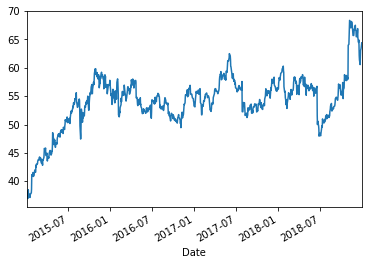

In [64]:
# adding a ';' gets rid of the memory address for the plot
df['Close'].plot();

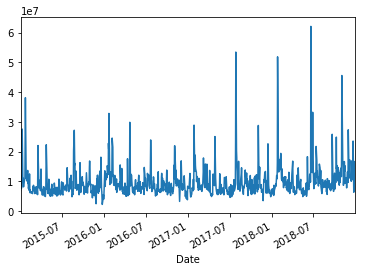

In [65]:
df['Volume'].plot();

In [0]:
# Customizing the plot
title = 'TITLE'
ylabel = 'Y Label'
xlabel = 'X Label'

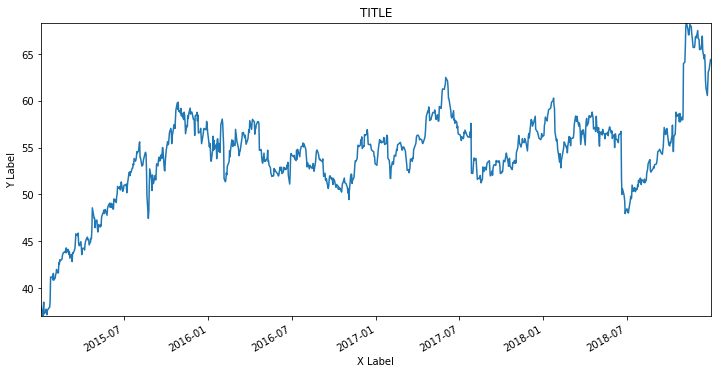

In [67]:
ax = df['Close'].plot(figsize = (12,6), title = title);
ax.autoscale(axis = 'both', tight = True)
ax.set(xlabel = xlabel, ylabel = ylabel);

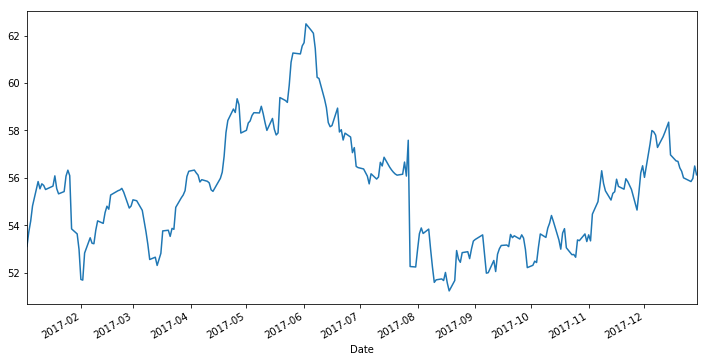

In [68]:
# Subsetting the df to plot
df['Close']['2017-01-01': '2017-12-31'].plot(figsize = (12,6));

We cna also achieve the same using a xlimiter inside the .plot()

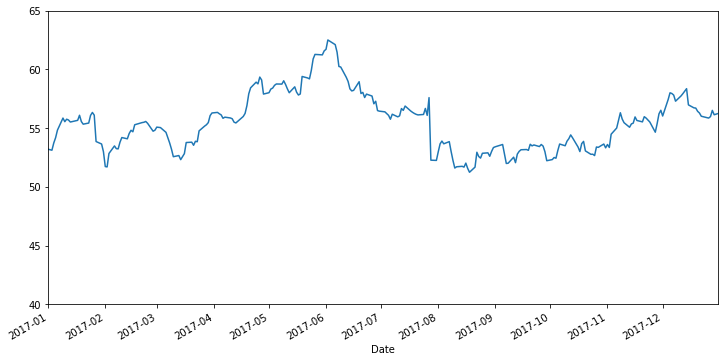

In [69]:
df['Close'].plot(figsize = (12,6), xlim = ['2017-01-01', '2017-12-31'], ylim = [40,65]);

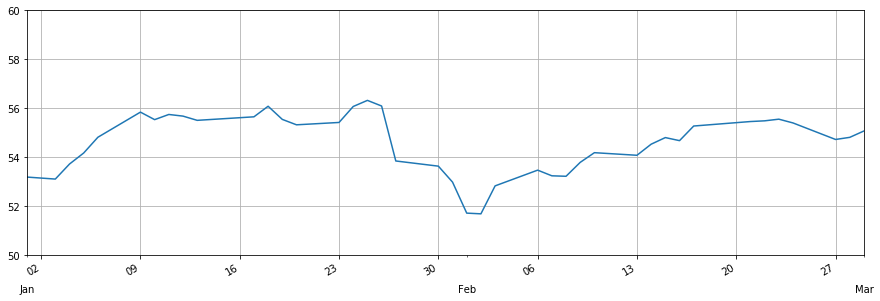

In [84]:
# Improving Visualizations
from matplotlib import dates
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'],ylim=[50,60], figsize = (15,5));
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0)) #spreads the x-ticks' location one week apart
ax.xaxis.set_major_formatter(dates.DateFormatter('%d')) # format the x-ticks

# Modify minor axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

# Add gridlines
ax.yaxis.grid(True)
ax.xaxis.grid(True)

## Time Series Exercise
Using the Value of Manufacturer' Shipments dataset to answer some questions.

In [85]:
df1 = pd.read_csv('UMTMVS.csv')
df1.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


Set the DATE column as the index of the df

In [87]:
df1 = df1.set_index('DATE')
df1.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


Check data type of the index

In [89]:
df1.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

Convert the index to a datetime index.

In [0]:
df1.index = pd.to_datetime(df1.index)

In [93]:
df1.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

Create a simple plot for the data

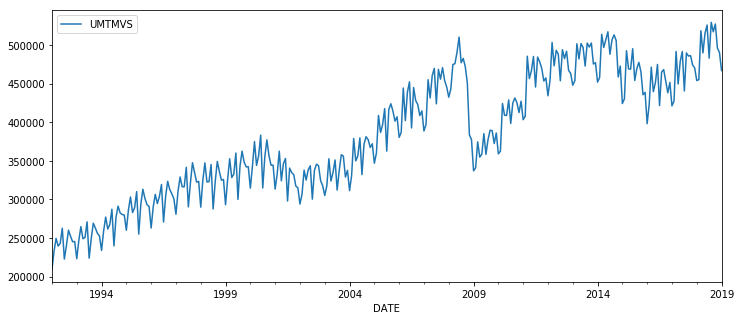

In [94]:
df1.plot(figsize = (12, 5))

**Q1- What was the percentage increase in value from Jan 2009 to Jan 2019?**

In [95]:
# first grab location of those data points
 100 * (df1.loc['2019-01-01'] - df1.loc['2009-01-01']) / df1.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

**Q2- What was the percentage decrease from Jan 2008 to Jan 2009?**

In [97]:
100 * (df1.loc['2009-01-01'] - df1.loc['2008-01-01']) / df1.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

**Q3- What is the month with the least value after 2005?**

In [98]:
# we can use idxmin to get the min value for this range
df1.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**Q4- What six months have th ehighest value?**

In [99]:
# use sort_values
df1.sort_values(by = 'UMTMVS', ascending = False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


**Q5- How many millions of dollars in value was lost in 2008? / What is the value difference between Jan 2008 and Jan 2009**

In [101]:
df1.loc['2008-01-01'] - df1.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average in millions of dollars per year**

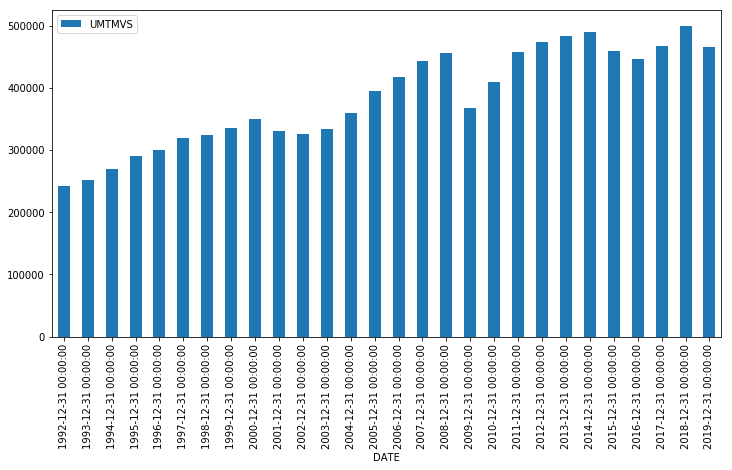

In [103]:
# Since we have monthly data we need to resample by year 'Y' and then plot it
df1.resample('Y').mean().plot.bar(figsize = (12,6))

**What year had the biggest increase in mean value from the previous year's mena value?**

In [0]:
# resample yearly
yearly_data = df1.resample('Y').mean()

In [0]:
# shift the yearly data by one year
yearly_data_shift = yearly_data.shift(1)

In [0]:
change = yearly_data - yearly_data_shift

In [108]:
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


In [110]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot the yearly rolling mean on top of the original data.**

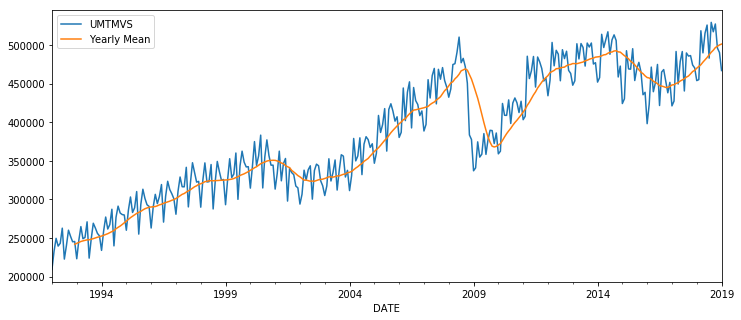

In [115]:
df1['Yearly Mean'] = df1['UMTMVS'].rolling(window = 12).mean()
df1.plot(figsize = (12,5))



**At some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak?**

In [137]:
df2 = pd.read_csv('UMTMVS.csv', index_col = 'DATE', parse_dates = True)
df2.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [0]:
df2008 = df2.loc['2008-01-01':'2009-01-01']

In [139]:
df2008.head()

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0


In [140]:
# find max value of 2008
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [141]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [0]:
df_post_peak = df2.loc['2008-06-01':]

In [143]:
df_post_peak[df_post_peak >= 510081.0].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [145]:
len(df2.loc['2008-06-01':'2014-03-01'])

70